In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

from PIL import Image
from glob import glob
import os

Mounted at /content/gdrive


In [2]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

def resize_images(img_path, target_size):
    img_types = ["rock","scissors","paper"]
    if not os.path.isdir("/content/gdrive/MyDrive/deep-learning"):
        os.mkdir("/content/gdrive/MyDrive/deep-learning")
    for img_type in img_types:
        resized_img_path = "/content/gdrive/MyDrive/deep-learning/" + img_type
        if not os.path.isdir(resized_img_path):
            os.mkdir(resized_img_path)
        img_list = glob(img_path + "/" + img_type + "/*")
        for i, img in enumerate(img_list):
            original_img = Image.open(img).convert('RGB')
            resized_img = original_img.resize(target_size, Image.ANTIALIAS)
            img_name = img.split("/")[-1]
            resized_img.save(resized_img_path + "/" + img_name, 'png')

            # data = img_to_array(resized_img)

            # samples = expand_dims(data, 0)

            # # create image data augmentation generator
            # datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, rotation_range=90)

            # # prepare iterator
            # it = datagen.flow(samples, batch_size=1, save_format="png",save_to_dir = f"{resized_img_path}")

            # # generate samples and plot
            # fig = plt.figure(figsize = (20,20))
            # for i in range(4):
            #     # define subplot
            #     plt.subplot(330 + 1 + i)
            #     # generate batch of images
            #     batch = it.next()
            #     # convert to unsigned integers for viewing
            #     image = batch[0].astype('uint8')
            #     # plot raw pixel data
            #     plt.imshow(image)

            # fig.savefig('파일')

        print(img_type, " : ", len(img_list), "DONE")

In [3]:
resize_images("/content/gdrive/MyDrive/deeplearning", (128, 128))

rock  :  1026 DONE
scissors  :  1020 DONE
paper  :  1026 DONE


In [4]:
import numpy as np
import glob

def load_data(img_path, img_size):  # 가위바위보 이미지 개수 총합에 주의
    paper = glob.glob(img_path + "/paper/*")
    rock = glob.glob(img_path + "/rock/*")
    scissors = glob.glob(img_path + "/scissors/*")
    number_of_data = len(paper) + len(rock) + len(scissors)
    color=3
    #이미지 데이터와 라벨(주먹 : 0, 가위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color,
                    dtype = np.int32)\
        .reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data ,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 주먹 : 0
        idx=idx+1
    print("rock")

    for file in glob.iglob(img_path+'/scissors/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 가위 : 1
        idx=idx+1  
    print("scissors")
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    print("done")

    return imgs, labels

# 새 섹션

In [5]:
image_dir_path = "/content/gdrive/MyDrive/deep-learning"
(x, y)=load_data(image_dir_path, 128)
x_norm = x/255.0   # 입력은 0~1 사이의 값으로 정규화

print(f"x_train shape: {x.shape}")
print(f"y_train shape: {y.shape}")

rock
scissors
done
x_train shape: (3072, 128, 128, 3)
y_train shape: (3072,)


x_train shape: (3072, 128, 128, 3)
라벨:  0


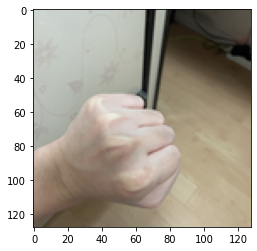

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x[1000])
print(f"x_train shape: {x.shape}")
print('라벨: ', y[0])

In [7]:
def train_val_test_split(ds, sd, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # trainning set, validation set, test set 을 동일하게 섞기 위해 seed 를 설정
        ds_shuffled = np.random.RandomState(seed=sd).permutation(ds)
    
    train_size = int(train_split * len(ds))
    val_size = int(val_split * len(ds))
    
    train_ds = ds_shuffled[0:train_size]    
    val_ds = ds_shuffled[train_size:train_size+val_size]
    test_ds = ds_shuffled[train_size+val_size:]
    
    return train_ds, val_ds, test_ds

x_train, x_val, x_test = train_val_test_split(x,30)
y_train, y_val, y_test = train_val_test_split(y,30)

In [8]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2457, 128, 128, 3)
(307, 128, 128, 3)
(308, 128, 128, 3)
(2457,)
(307,)
(308,)


In [14]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128 ,128,3)))
model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Dropout(0,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Dropout(0,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dropout(0,2))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [15]:
x_train_norm = x_train / 255.0

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
77/77 [==============================] - 1s 7ms/step - loss: 1.1997 - accuracy: 0.3329
Epoch 2/10
77/77 [==============================] - 1s 7ms/step - loss: 1.0959 - accuracy: 0.3667
Epoch 3/10
77/77 [==============================] - 1s 7ms/step - loss: 1.0708 - accuracy: 0.4123
Epoch 4/10
77/77 [==============================] - 1s 7ms/step - loss: 0.9501 - accuracy: 0.5568
Epoch 5/10
77/77 [==============================] - 1s 7ms/step - loss: 0.7521 - accuracy: 0.6854
Epoch 6/10
77/77 [==============================] - 1s 7ms/step - loss: 0.5928 - accuracy: 0.7648
Epoch 7/10
77/77 [==============================] - 1s 7ms/step - loss: 0.4629 - accuracy: 0.8282
Epoch 8/10
77/77 [==============================] - 1s 7ms/step - loss: 0.3613 - accuracy: 0.8669
Epoch 9/10
77/77 [==============================] - 1s 7ms/step - loss: 0.2717 - accuracy: 0.9031
Epoch 10/10
77/77 [==============================] - 1s 7ms/step - loss: 0.2138 - accuracy: 0.9324


In [16]:
test_loss, test_accuracy = model.evaluate(x_test / 255.0, y_test, verbose = 2)

print("최종 test_loss : {}".format(test_loss))
print("최종 test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 1.0770 - accuracy: 0.6818 - 145ms/epoch - 14ms/step
최종 test_loss : 1.0769578218460083
최종 test_accuracy : 0.6818181872367859


In [17]:
val_loss, val_accuracy = model.evaluate(x_val / 255.0, y_val, verbose = 2)

print("test_loss : {}".format(val_loss))
print("test_accuracy : {}".format(val_accuracy))

10/10 - 0s - loss: 1.4510 - accuracy: 0.6221 - 58ms/epoch - 6ms/step
test_loss : 1.4509685039520264
test_accuracy : 0.6221498250961304


In [13]:
predictions = model.predict(x_val)

print("y_test = ", y_val[:40])
print("predic = ", np.argmax(predictions[:40], axis=1))


y_test =  [0 1 1 1 0 0 0 0 1 2 1 0 1 1 1 0 2 2 2 0 0 2 1 2 0 2 0 0 1 2 2 0 0 1 2 1 0
 1 0 0]
predic =  [2 1 1 2 2 2 0 0 1 2 0 1 2 1 1 0 2 2 2 0 0 2 2 2 2 2 2 1 1 0 2 0 1 1 1 2 2
 2 0 0]
